<h1>Analisis Exploratorio de Datos (EDA).</h1>

<h2>1. Listado de Variables y Selección.</h2>

El dataset que utilizaremos esta constituido con un total de 3000 filas x 16 columnas, que muestran por cada paciente(de género: F o M, y Edad) un conjunto de síntomas y actividades que poseen, toda esta informacion se encuentra en el archivo dataset "Lung_Cancer.csv"

<h3>Variables de Entrada.</h3>

Consideraremos para este Trabajo: 1 = **SI**, 0 = **NO**.

- **Gender:** Género del paciente, Actualmente (F: Femenino, M: Masculino), **lo vamos a reconvertir** (1: Masculino, 0: Femenino).
- **Age:** Edad del paciente.
- **Smoking:** Si el paciente es un fumador habitual.
- **Yellow_Fingers:** Si el paciente posee el síntoma de *Dedos Amarillos.*
- **Anxiety:** Si el paciente posee el síntoma de *Ansiedad.*
- **Peer_Pressure:** Si el paciente sufre de *Presión* por fumar o tomar alcohol.
- **Chronic_Disease:** Si el paciente sufre de algun tipo de enfermedad crónica.
- **Fatigue:** Si el paciente experimenta *Fatiga.*
- **Allergy:** Si el paciente sufre de algún tipo de *Alergia.*
- **Wheezing:** Si se oye algún tipo de sonido agudo en la respiración del paciente.
- **Alcohol_Consuming:** Si el paciente es alcoholico.
- **Coughing:** Si el paciente presenta *Tos.*
- **Shortness_Of_Breath:** Si el paciente posee dificultad para respirar.
- **Swallowing_Dificulty:** Si el paciente posee dificultad para tragar.
- **Chest_Pain:** Si el paciente padece de dolor en el pecho.

<h3>Variable de Salida.</h3>

Nuestra variable de salida será **LUNG_CANCER:** El diagnóstico final sobre la presencia de Cáncer de Pulmón, Actualmente (YES, NO), **lo vamos a reconvertir** (1: SI, 0: NO). Con esta variable vamos a predecir si un paciente posee Cáncer de Pulmón o no. 

<h3>Variables que no se Utilizarán.</h3>

Utilizaremos todas las variables ya que no creemos que haya alguna que no afecte al resultado.

In [2619]:
# Importamos las dependencias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import sklearn_pandas
from matplotlib import gridspec
import pytz
import random
import os

In [2620]:
# Importamos el dataset.
dataset = pd.read_csv('Lung_Cancer.csv',encoding='UTF-8')

dataset.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
939,F,45,1,2,2,2,1,2,1,2,2,1,1,2,2,NO
1543,F,45,1,2,2,1,2,1,2,1,2,2,1,1,2,YES
142,F,76,2,2,2,1,2,2,1,2,1,2,2,1,1,NO
1015,M,60,2,2,1,1,1,1,1,2,2,1,1,1,1,NO
1300,F,72,1,2,1,2,1,2,1,2,1,2,2,2,1,YES


In [2621]:
# Tipo de datos y dimensiones del Dataset.
dataset.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [2622]:
# Filas x Columnas.
dataset.shape

(3000, 16)

<h2>2. Análisis detallado de un conjunto de variables.</h2>

<h3>a. Comportamiento de la variable de Salida.</h3>

In [2623]:
# Reconvertimos el género y todos los demas datos a valores enteros: (1: Masculino, 0: Femenino). (1: SI, 0: NO).
data = dataset.copy()
data['GENDER'] = data.GENDER.map({'M' : 1, 'F' : 0})
data['SMOKING'] = data.SMOKING.map({1 : 0, 2 : 1})
data['YELLOW_FINGERS'] = data.YELLOW_FINGERS.map({1 : 0, 2 : 1})
data['ANXIETY'] = data.ANXIETY.map({1 : 0, 2 : 1})
data['PEER_PRESSURE'] = data.PEER_PRESSURE.map({1 : 0, 2 : 1})
data['CHRONIC_DISEASE'] = data.CHRONIC_DISEASE.map({1 : 0, 2 : 1})
data['FATIGUE'] = data.FATIGUE.map({1 : 0, 2 : 1})
data['ALLERGY'] = data.ALLERGY.map({1 : 0, 2 : 1})
data['WHEEZING'] = data.WHEEZING.map({1 : 0, 2 : 1})
data['ALCOHOL_CONSUMING'] = data.ALCOHOL_CONSUMING.map({1 : 0, 2 : 1})
data['COUGHING'] = data.COUGHING.map({1 : 0, 2 : 1})
data['SHORTNESS_OF_BREATH'] = data.SHORTNESS_OF_BREATH.map({1 : 0, 2 : 1})
data['SWALLOWING_DIFFICULTY'] = data.SWALLOWING_DIFFICULTY.map({1 : 0, 2 : 1})
data['CHEST_PAIN'] = data.CHEST_PAIN.map({1 : 0, 2 : 1})
data.LUNG_CANCER = data.LUNG_CANCER.map({'YES': 1, 'NO': 0})
data.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
1457,0,75,0,1,1,1,0,0,0,1,0,1,0,1,1,1
2348,0,36,1,0,0,0,0,1,1,0,0,1,0,0,1,1
1864,1,41,1,1,0,0,1,1,0,1,0,0,0,1,1,1
966,0,72,1,0,0,1,1,1,1,1,0,0,1,1,0,0
588,0,61,0,1,1,0,1,1,0,1,0,1,0,1,0,0
608,0,64,0,1,1,1,0,1,0,0,0,1,1,0,0,1
907,0,57,1,1,0,1,0,1,0,1,1,1,0,0,1,0
1085,0,32,0,1,1,0,0,1,0,0,1,0,1,0,1,0
2601,0,59,1,0,0,1,1,1,0,1,1,1,1,1,1,1
2719,1,51,0,1,0,1,1,0,1,0,1,1,0,1,1,0


<Axes: ylabel='count'>

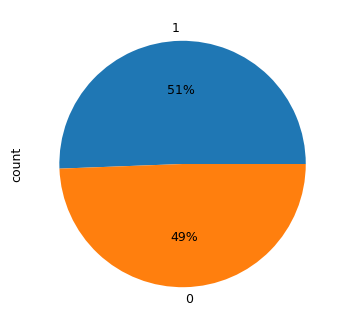

In [2624]:
# Graficamos la distribución de la variable de salida.
data.LUNG_CANCER.value_counts().plot.pie(autopct='%1.0f%%',figsize=(4,4))

Podemos observar que el dataset se encuentra balanceado en cuanto a la cantidad de pacientes que poseen cancer de pulmón. Vemos que el 51% de los pacientes cuentan con un diagnóstico positivo de cáncer de pulmon, mientras que el otro 49% no, ésta es una relación muy pareja, 50/50.

<h2>b. Análisis individual de cada variable de entrada.</h2>

**Variable: Gender.** 

Nuestro conjunto de datos esta compuesto a grandes rasgos por un 50% de Hombres (1514) y un 50% de Mujeres (1486).

In [2625]:
# Graficamos la distribución de la variable de entrada "Gender".
px.histogram(dataset, x='GENDER', title = 'Distribución')

In [2626]:
# Graficamos la relación entre la variable de entrada y la de salida. 
# 1: Masculino, 2: Femenino.
# Naranja: Positivo, Lila: Negativo.
px.histogram(data, x='GENDER', color='LUNG_CANCER', barmode='group')

Por lo que podemos observar, el género del paciente no es una variable que tiene mucho peso en nuestro dataset, es decir, que una persona sea mujer u hombre, no es es tan imprescindible para nuestro análisis, vemos que los resultados son muy parejos, de la cantidad de hombres, la mitad poseen un diagnóstico positivo y la mitad no, mismo caso en mujeres.

**Variable: Age.**

In [2627]:
# Graficamos la distribución de la variable de entrada "Age".
px.histogram(dataset, x='AGE', title = 'Distribución')

Por lo que podemos ver a partir del histograma anterior, tenemos un promedio de 100 pacientes por cada edad, excepto los pacientes mayores a 80 años, con los cuales contamos con 57. Éste dato es sumamente importante ya que si contaramos con un dataset en donde tendríamos un cuarto de pacientes jovenes o mayores podríamos tener problemas de "Overfitting", es decir podría dejar influenciarse por esa cantidad y predecir erróneamente.

In [2628]:
# Graficamos la relación entre la variable de entrada y la de salida. 
# Naranja: Positivo, Lila: Negativo.
px.histogram(data, x='AGE', color='LUNG_CANCER', barmode='group')

Podemos observar que los pacientes que tienen entre 32 y 46 años y entre 70 y 81 años en su mayoría poseen un diagnóstico de cáncer de pulmon positivo, mientras que el resto en promedio su porcentaje es negativo, igualmente con respecto a la edad podemos ver que nuestro dataset se encuentra bastante balanceado, tenemos pacientes de todas las edades que presentan un diagnóstico positivo y negativo.

**Variable: Smoking.**

<Axes: title={'center': 'Distribución'}, ylabel='count'>

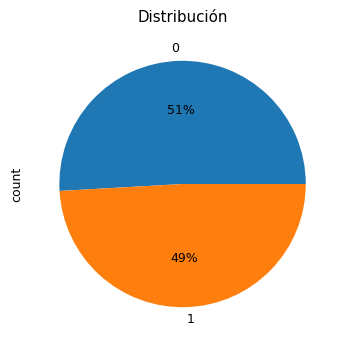

In [2629]:
# Graficamos la distribución de la variable de entrada
# Vemos que el 51% NO son fumadores, mientras que el 49% si lo son.
data.SMOKING.value_counts().plot.pie(autopct='%1.0f%%',figsize=(4,4), title = 'Distribución')

Text(0.5, 1.0, 'Pacientes con diagnóstico Positivo COUGHING/No COUGHING')

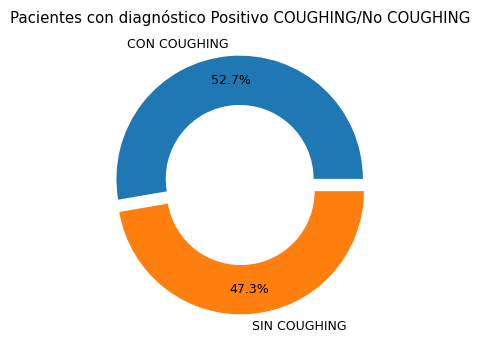

In [2630]:
#¿Que Porcentaje de pacientes con COUGHING (Tos) poseen un diagnóstico POSITIVO de cáncer de Pulón?
pie_data = data[data['LUNG_CANCER']==1]['COUGHING'].value_counts()
labels = []
for i in pie_data.index:
    if i == 0:
        labels.append('SIN COUGHING')
    else:
        labels.append('CON COUGHING')
explode = [0.05,0.05]
plt.pie(pie_data,labels = labels,autopct='%1.1f%%',pctdistance = 0.8,wedgeprops={'width': 0.4},explode = explode)
plt.title('Pacientes con diagnóstico Positivo COUGHING/No COUGHING')

Podemos observar que entre aquellos pacientes con diagnóstico positivo de cáncer de pulmón, el 52.7% de los pacientes presentan tos, mientras que el 47.3% no poseen.

Text(0.5, 1.0, 'Pacientes con diagnóstico Positivo YELLOW_FINGERS/No YELLOW_FINGERS')

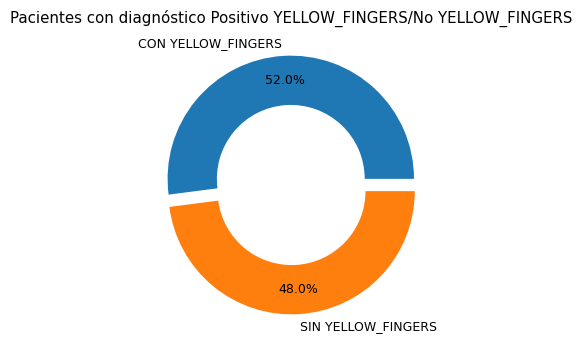

In [2631]:
#¿Que Porcentaje de pacientes con DEDOS AMARILLOS poseen un diagnóstico POSITIVO de cáncer de Pulón?
pie_data = data[data['LUNG_CANCER']==1]['YELLOW_FINGERS'].value_counts()
labels = []
for i in pie_data.index:
    if i == 0:
        labels.append('SIN YELLOW_FINGERS')
    else:
        labels.append('CON YELLOW_FINGERS')
explode = [0.05,0.05]
plt.pie(pie_data,labels = labels,autopct='%1.1f%%',pctdistance = 0.8,wedgeprops={'width': 0.4},explode = explode)
plt.title('Pacientes con diagnóstico Positivo YELLOW_FINGERS/No YELLOW_FINGERS')

Podemos observar que entre aquellos pacientes con diagnóstico positivo de cáncer de pulmón, el 52.0% de los pacientes presentan dedos amarillos, mientras que el 48.0% no lo poseen.

Text(0.5, 1.0, 'Pacientes con diagnóstico Positivo Fumadores/No Fumadores')

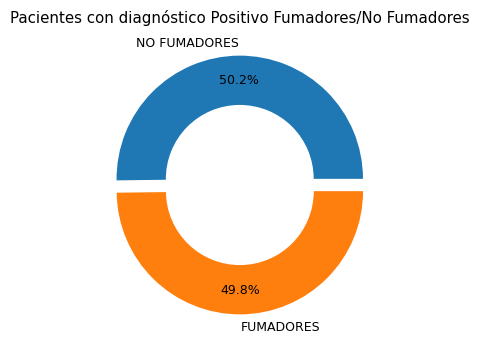

In [2632]:
#¿Que Porcentaje de pacientes FUMADORES poseen un diagnóstico POSITIVO de cáncer de Pulón?
pie_data = data[data['LUNG_CANCER']==1]['SMOKING'].value_counts()
labels = []
for i in pie_data.index:
    if i == 0:
        labels.append('NO FUMADORES')
    else:
        labels.append('FUMADORES')
explode = [0.05,0.05]
plt.pie(pie_data,labels = labels,autopct='%1.1f%%',pctdistance = 0.8,wedgeprops={'width': 0.4},explode = explode)
plt.title('Pacientes con diagnóstico Positivo Fumadores/No Fumadores')

Podemos observar que entre aquellos pacientes con diagnóstico positivo de cáncer de pulmón, el 50.2% de los pacientes son NO fumadores, mientras que el 49.8% SI lo son.

In [2633]:
# Menores de 50 años fumadores con cancer de pulmon positivo.
filtered_data = data[(data['AGE'] < 55) & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)]
px.histogram(filtered_data, x='AGE', color='LUNG_CANCER', barmode='group')
fig = px.histogram(filtered_data, x='AGE', color='LUNG_CANCER', barmode='group')
fig.update_traces(text=filtered_data.groupby(['AGE', 'LUNG_CANCER']).size().values, textposition='auto')
fig.show()

In [2634]:
# Mayores de 50 años fumadores con cancer de pulmon positivo.
filtered_data = data[(data['AGE'] > 55) & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)]
px.histogram(filtered_data, x='AGE', color='LUNG_CANCER', barmode='group')
fig = px.histogram(filtered_data, x='AGE', color='LUNG_CANCER', barmode='group')
fig.update_traces(text=filtered_data.groupby(['AGE', 'LUNG_CANCER']).size().values, textposition='auto')
fig.show()

In [2635]:
edad_30_47 = data[(data['AGE'] >= 30) & (data['AGE'] < 47)] & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)
edad_47_64 = data[(data['AGE'] >= 47) & (data['AGE'] < 64)] & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)
edad_64_81 = data[(data['AGE'] >= 64) & (data['AGE'] < 82)] & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)
totals_data = {'Grupo de Edad': ['Entre 30 y 45 Años', 'Entre 45 y 60 años', 'Mas de 60 años'],
               'Cantidad Total de Casos': [len(edad_30_47), len(edad_47_64), len(edad_64_81)]}

totals_df = pd.DataFrame(data=totals_data)

fig = px.histogram(totals_df, x='Grupo de Edad', y='Cantidad Total de Casos', color='Grupo de Edad', 
             labels={'Cantidad Total de Casos': 'Cantidad Total de Casos'})

fig.show()

Lo que hicimos anteriormente fue comparar nuestras variables de entrada ("AGE" y "SMOKING") contra nuestra variable de salida "LUNG_CANCER", para hacer esto sacamos el numero de LA CANTIDAD de casos con diagnostico de cancer positivo que son fumadores habituales y los agrupamos en edades, podemos observar que nuestro dataset esta muy balanceado.

<h2>c. Transformación de Variables de entrada para utilizar en el modelo.</h2>

Nuestro dataset se compone principalmente de valores binarios, es decir, si el paciente presenta o no dicho diagnostico, ademas contamos con una variable Género y Edad.
Como vimos anteriormente lo que hicimos en nuestro dataset fue convertir todas las variables que ya nos venian por defecto (2: SI, 1: NO), en valores binarios (1 y 0), por lo que nos quedaria 1: SI, 0: NO, esta conversión la hicimos anteriormente en el apartado a).
Para nuestra variable "Age" lo que haremos para poder utilizarla como variable de entrada al modelo, será escalarla utilizando un "StandardScaler()".
Para nuestra variable "Gender" lo que haremos para poder utilizarla como variable de entrada al modelo, será aplicarle un "OneHotEncoder()".

In [2636]:
#Nuestro dataset esta quedando de esta forma, sin el StandarScaler y OneHotEncoder, que lo aplicaremos en el mapper cuando entrenemos.
data.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
1623,0,34,0,1,1,0,0,1,1,0,0,1,0,0,1,1
582,0,60,0,1,0,1,1,0,0,0,1,1,0,0,1,0
490,1,58,0,0,1,1,0,0,0,0,1,0,0,0,1,0
837,0,37,0,1,1,1,0,0,0,1,1,0,1,0,0,1
1052,1,75,1,0,1,1,1,1,0,0,1,0,1,0,0,1
2499,1,47,1,1,0,1,1,0,0,0,1,0,1,0,0,1
2390,0,65,0,1,1,1,1,0,0,1,1,0,0,1,0,0
664,1,55,0,0,0,1,1,1,1,0,1,1,0,0,1,1
2482,1,30,0,0,1,0,0,1,0,1,0,0,1,1,1,1
31,1,72,1,1,1,1,1,0,0,0,0,1,0,1,0,1


<h2>d. Análisis de variables Nulos/Extremos/Duplicados.</h2>

In [2637]:
# Por lo que podemos observar el Dataset no tiene valores nulos.
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [2638]:
#Vamos a comprobar si hay duplicados.
duplicates = data[data.duplicated(keep= False)]
print(duplicates)

      GENDER  AGE  SMOKING  ...  SWALLOWING_DIFFICULTY  CHEST_PAIN  LUNG_CANCER
962        1   53        0  ...                      0           1            0
1051       1   50        0  ...                      0           1            1
1476       1   53        0  ...                      0           1            0
2039       1   50        0  ...                      0           1            1

[4 rows x 16 columns]


Podemos ver que hay únicamente 2 registros duplicados, los podemos descartar ya que estos registros no afectan demasiado a nuestro análisis. Sin embargo, es interesante observar que existe la posibilidad de tener aleatoriamente los mismos valores que otro paciente, ya que todas ellas son respuestas booleanas (aparte de la edad).

In [2639]:
#Descartamos los duplicados.
print('Tamaño del Dataset antes del descarte: ', len(data))
data.drop_duplicates(inplace= True)
print('Tamaño del Dataset luego del descarte: ', len(data))

Tamaño del Dataset antes del descarte:  3000
Tamaño del Dataset luego del descarte:  2998


<h2>e. Verificación de Variables Altamente correlacionadas linealmente.</h2>

In [2640]:
#Escalamos las variables para poder observar mejor la correlación entre ellas.
int_data = data.select_dtypes(include='int64')
int_data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,0.011134,-0.027873,0.014440,-0.023914,0.009363,0.008507,0.002181,0.013890,-0.009294,-0.009191,-0.006185,0.011559,-0.015841,-0.001972,-0.016117
AGE,0.011134,1.000000,-0.020459,0.016034,0.029996,0.004018,-0.025735,-0.002251,0.024755,-0.018150,-0.020640,-0.024754,-0.015709,-0.001851,-0.005262,-0.035659
SMOKING,-0.027873,-0.020459,1.000000,-0.001516,-0.055591,-0.031405,0.045715,0.019662,0.004247,0.000575,0.003036,0.012371,-0.015111,-0.002349,-0.030750,0.014221
YELLOW_FINGERS,0.014440,0.016034,-0.001516,1.000000,0.011683,0.011420,-0.013892,-0.010100,-0.005732,0.004821,0.027853,0.010100,-0.034022,0.018584,-0.006580,0.013679
ANXIETY,-0.023914,0.029996,-0.055591,0.011683,1.000000,-0.024717,0.016247,-0.005587,-0.001166,-0.015409,-0.000876,-0.017101,-0.034999,0.033792,0.015972,-0.013867
PEER_PRESSURE,0.009363,0.004018,-0.031405,0.011420,-0.024717,1.000000,-0.021300,-0.017404,0.012047,-0.011355,0.013965,-0.013290,-0.029428,0.016628,-0.040036,-0.024653
CHRONIC_DISEASE,0.008507,-0.025735,0.045715,-0.013892,0.016247,-0.021300,1.000000,0.011746,-0.019623,0.022790,-0.027692,-0.003737,-0.020213,0.016404,-0.013947,-0.009574
FATIGUE,0.002181,-0.002251,0.019662,-0.010100,-0.005587,-0.017404,0.011746,1.000000,0.004961,0.014569,-0.000359,-0.001574,0.029525,0.010264,0.024620,0.001583
ALLERGY,0.013890,0.024755,0.004247,-0.005732,-0.001166,0.012047,-0.019623,0.004961,1.000000,0.005412,-0.011768,-0.045000,-0.041699,0.012292,0.019395,0.006504
WHEEZING,-0.009294,-0.018150,0.000575,0.004821,-0.015409,-0.011355,0.022790,0.014569,0.005412,1.000000,-0.004763,0.016125,-0.012144,-0.023461,-0.016029,-0.039299


<Axes: >

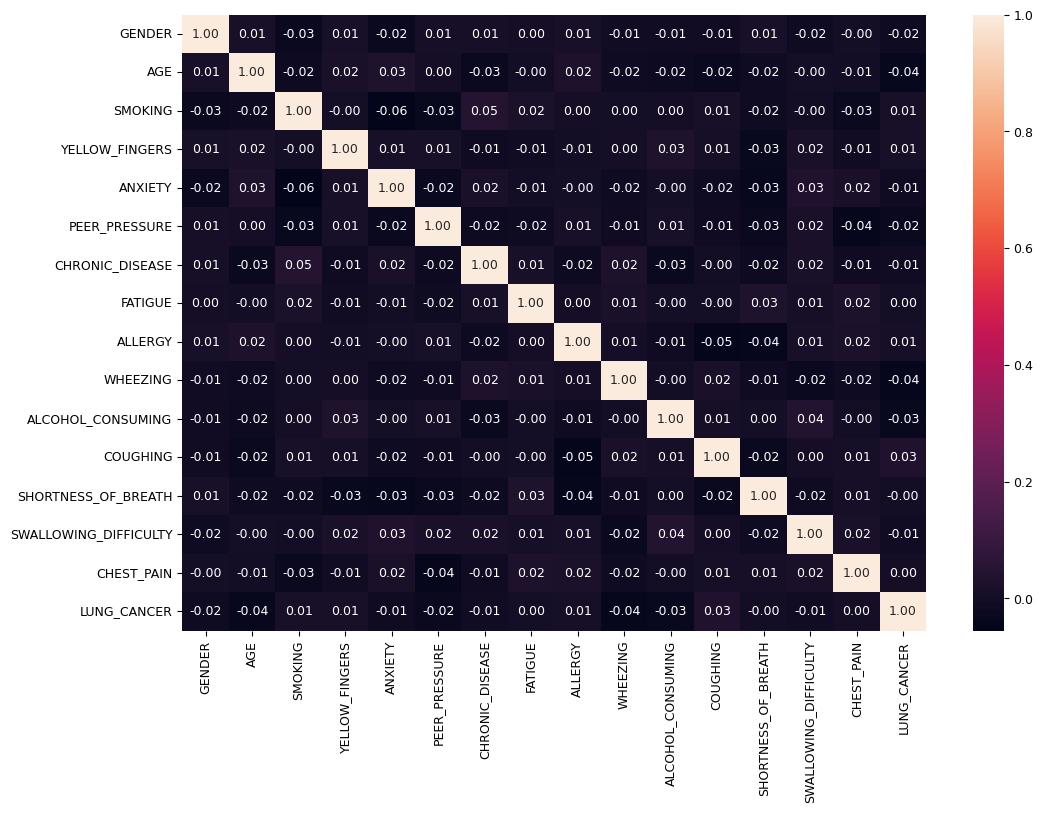

In [2641]:
#Ploteamos el mapa de correlación entre variables.
plt.figure(figsize= (12, 8))
sns.heatmap(data.corr(),  annot= True, fmt= '.2f')

Con los datos presentes en nuestro dataset podemos observar una muy mala correlacion con los datos, entre otras cosas podemos ver que fumar presenta una correlacion positiva de solo el 1% con el diagnostico positivo de cáncer de pulmon...y así con la mayoria de nuestras variables, no podemos notar alguna correlación bien marcada, lo que nos hace sospechar de la fuente de los datos, que parece estar muy balanceado.

<h2>f. Listado de posibles Dudas/Preguntas al encargado de .</h2>

1. ¿Cuál es la fuente de los datos utilizados en el dataset previsto?
2. ¿Qué tipo de información contiene el dataset?
3. ¿Cómo se recopilaron los datos del dataset?
4. ¿Qué características o variables están presentes en el dataset?
5. ¿Hay documentación disponible que explique la estructura y el significado de cada campo en el dataset?
6. ¿Se han realizado procesos de limpieza o preprocesamiento de los datos anteriormente en el dataset?
7. ¿Cuál es el tamaño del dataset (número de filas y columnas)?
8. ¿Hay alguna información sensible o confidencial en el dataset que debamos tener en cuenta?
9. ¿Qué tipo de análisis o modelos se han aplicado previamente a los datos del dataset?
10. ¿Cuál es el objetivo principal de utilizar el dataset de detección de cáncer de pulmón en este contexto específico?


<h2>3. Hipótesis sobre los datos.</h2>

<h3>a. Hipótesis sobre el Valor de la Variable "Target"</h3>

A partir del análisis exploratorio de datos, se pueden formular varias hipótesis para entender la relación entre la variable de diagnóstico de cáncer de pulmón (LUNG_CANCER) y las demás variables del conjunto de datos. A continuación, se presentan estas hipótesis detalladamente:

* **Influencia del Hábito de Fumar:** La hipótesis principal es que el hábito de fumar ejerce una influencia significativa en el diagnóstico de cáncer de pulmón. Aunque el análisis de correlación no muestra una relación extremadamente alta entre el hábito de fumar y el diagnóstico de cáncer, el hábito de fumar sigue siendo un factor de riesgo conocido y considerable. Los datos indican que el 49.8% de los pacientes diagnosticados con cáncer de pulmón son fumadores. Este porcentaje es comparable al de los no fumadores, sugiriendo que, aunque fumar es un factor relevante, no actúa como el único determinante del diagnóstico. Es posible que la influencia del hábito de fumar esté moderada por otros factores, como la edad o la presencia de síntomas.

* **Síntomas Asociados con el Cáncer:** Otra hipótesis es que la presencia de síntomas específicos, como tos (COUGHING) y dedos amarillos (YELLOW_FINGERS), está asociada con un mayor riesgo de cáncer de pulmón. Los datos muestran que aproximadamente el 52.7% de los pacientes con cáncer de pulmón reportan tos, y el 52.0% presentan dedos amarillos. Estos porcentajes son ligeramente superiores a los observados en la población general. Aunque estos síntomas podrían indicar la presencia de cáncer de pulmón, no son definitivos por sí mismos. La asociación entre estos síntomas y el diagnóstico sugiere que podrían ser indicadores importantes, pero deben ser considerados en conjunto con otras variables para una evaluación más precisa.

* **Edad como Factor de Riesgo:** La edad también podría ser un factor relevante en el diagnóstico de cáncer de pulmón. El análisis revela que los pacientes con cáncer de pulmón tienden a concentrarse en dos rangos etarios específicos: entre 32 y 46 años, y entre 70 y 81 años. Este hallazgo sugiere que tanto la juventud temprana como la edad avanzada están asociadas con una mayor incidencia de cáncer de pulmón. La influencia de la edad puede estar relacionada con la acumulación de factores de riesgo a lo largo del tiempo, así como con la predisposición genética o ambiental. La inclusión de la edad como una variable en el modelo podría mejorar la precisión del diagnóstico al capturar estas variaciones etarias.


<h3>b. Hallazgos Adicionales y su Impacto en la Creación de un Modelo</h3>

El análisis exploratorio de los datos del conjunto de pacientes diagnosticados con cáncer de pulmón ha revelado varios hallazgos adicionales que podrían influir significativamente en la construcción y precisión del modelo predictivo. Estos hallazgos son clave para mejorar la capacidad del modelo de identificar correctamente los casos de cáncer de pulmón y para determinar la importancia relativa de cada factor de riesgo. A continuación, se describen algunos de los principales hallazgos:

* **Balance de Clases en la Variable Objetivo:** El conjunto de datos está razonablemente balanceado en cuanto a la distribución de la variable objetivo (LUNG_CANCER). Aproximadamente la mitad de los pacientes del dataset han sido diagnosticados con cáncer de pulmón, mientras que la otra mitad no presenta este diagnóstico. Este equilibrio en las clases es un hallazgo positivo, ya que la ausencia de desbalance significativo evita el sesgo en los modelos supervisados. En un dataset altamente desbalanceado, un modelo podría sesgarse hacia la predicción de la clase mayoritaria, lo que llevaría a un bajo rendimiento en la identificación de casos menos comunes. Este balance asegura que el modelo pueda identificar tanto los pacientes con diagnóstico positivo como los negativos sin perder precisión.

* **Relación No Lineal entre Variables:** Aunque algunas variables, como el hábito de fumar y la presencia de síntomas, muestran una correlación con el diagnóstico de cáncer de pulmón, los análisis sugieren que estas relaciones no son lineales ni directas. Esto implica que factores adicionales podrían estar interactuando entre sí para influir en el diagnóstico. Por ejemplo, variables como la edad, el historial familiar y factores ambientales, aunque no tengan una correlación aislada alta, podrían tener un efecto combinado que sea más significativo. La incorporación de modelos que capturen interacciones no lineales, como árboles de decisión o redes neuronales, podría mejorar la capacidad de predicción.

* **Baja Variabilidad entre Pacientes Fumadores y No Fumadores:** A pesar de que el tabaquismo es un conocido factor de riesgo para el cáncer de pulmón, el análisis de este dataset muestra una diferencia relativamente pequeña entre fumadores y no fumadores. Esto podría indicar que el cáncer de pulmón en este conjunto de datos no depende exclusivamente de este hábito, o que hay otras variables, como predisposición genética o exposición a factores ambientales, que también juegan un papel crucial. Este hallazgo sugiere que el modelo debe ser diseñado para no sobrestimar la importancia del tabaquismo y prestar atención a otros factores para mejorar su rendimiento predictivo.

* **Rangos Etarios en la Distribución del Diagnóstico:** Un hallazgo relevante es la distribución del cáncer de pulmón en rangos de edad específicos, particularmente en pacientes jóvenes y de edad avanzada. Los pacientes diagnosticados se encuentran concentrados en dos grupos etarios: de 32 a 46 años y de 70 a 81 años. Este hallazgo sugiere que los modelos predictivos deben tener en cuenta la edad como un factor clave, posiblemente utilizando una función no lineal o categorizando la edad en intervalos, para reflejar mejor los patrones observados en los datos.


El impacto de estos hallazgos en la creación del modelo es significativo. En primer lugar, el balance en la variable objetivo permite utilizar modelos tradicionales de clasificación sin tener que aplicar técnicas para corregir el desbalance de clases. Sin embargo, debido a la naturaleza no lineal de las relaciones entre las variables, puede ser necesario considerar modelos avanzados como redes neuronales, máquinas de soporte vectorial o ensamblados de modelos (como Random Forest o Gradient Boosting) que capturen mejor las interacciones complejas.

Además, la presencia de multicolinealidad y de relaciones no evidentes entre variables como el tabaquismo y otros síntomas implica que es esencial un proceso de ingeniería de características (feature engineering) cuidadoso. Esto incluye la posible transformación de variables y la inclusión de interacciones entre variables para capturar mejor las relaciones subyacentes.

Finalmente, el uso de técnicas de validación cruzada y la inclusión de métricas de rendimiento robustas (como precisión, recall y F1-score) serán esenciales para evaluar adecuadamente el rendimiento del modelo y garantizar que no se sobreajuste a los patrones específicos del conjunto de datos actual.

<h3>c. Análisis sobre la Creación de Nuevas Variables</h3>

En el análisis de datos para el diagnóstico de cáncer de pulmón, la creación de variables derivadas a partir de los datos existentes puede aportar información adicional valiosa para mejorar la capacidad predictiva del modelo. A continuación, se exploran tres posibles variables derivadas y su impacto potencial en el modelo:



1. **Índice de riesgo respiratorio:** esta variable derivada combina los síntomas respiratorios podría proporcionar una visión más clara del riesgo general asociado a estos síntomas. Para ello, hemos creado una variable que suma la presencia de tos (COUGHING), dificultad para respirar (SHORTNESS_OF_BREATH) y silbido al respirar (WHEEZING). Esta variable tiene como objetivo identificar a los pacientes que presentan múltiples síntomas respiratorios, lo cual puede ser un indicador más fuerte de riesgo.

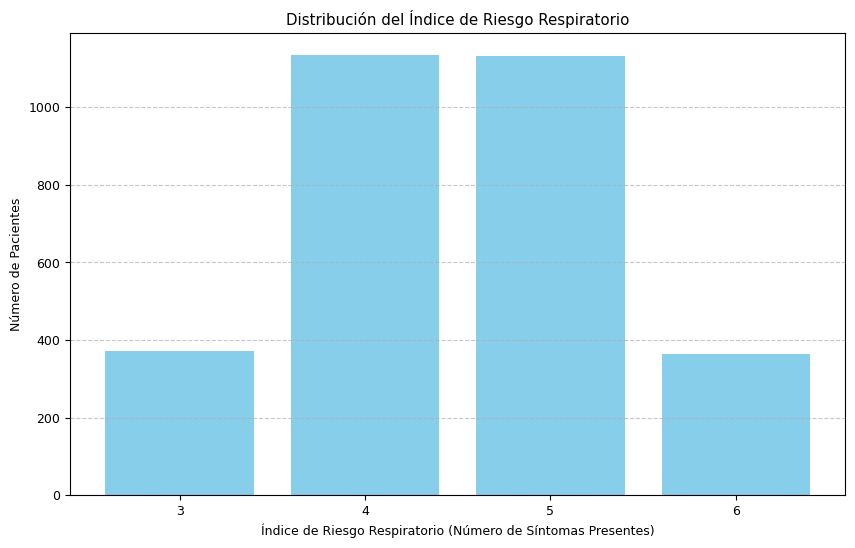

In [2642]:
# Creamos la variable combinada para el índice de riesgo respiratorio
dataset['Respiratory_Risk'] = dataset[['COUGHING', 'SHORTNESS_OF_BREATH', 'WHEEZING']].sum(axis=1)

# Contar la frecuencia de cada nivel del índice de riesgo respiratorio
risk_counts = dataset['Respiratory_Risk'].value_counts().sort_index()

# Creamos un gráfico de barras para mostrar la distribución del índice de riesgo respiratorio
plt.figure(figsize=(10, 6))
plt.bar(risk_counts.index, risk_counts.values, color='skyblue')
plt.xlabel('Índice de Riesgo Respiratorio (Número de Síntomas Presentes)')
plt.ylabel('Número de Pacientes')
plt.title('Distribución del Índice de Riesgo Respiratorio')
plt.xticks(risk_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Descripción del Gráfico:** El gráfico de barras muestra la distribución del índice de riesgo respiratorio, el cual representa el número de síntomas respiratorios presentes en cada paciente. El eje X indica el número total de síntomas respiratorios (de 0 a 3) y el eje Y muestra el número de pacientes que presentan cada nivel de síntomas. Este gráfico permite visualizar cómo varía la prevalencia de pacientes según el número de síntomas respiratorios.

2. **Riesgo Combinado de Tabaquismo y Síntomas Respiratorios:** La combinación del hábito de fumar con síntomas respiratorios puede proporcionar una visión más detallada del riesgo asociado al cáncer de pulmón. En este caso, creamos una variable que refleja la presencia de tabaquismo y la cantidad de síntomas respiratorios. Esta variable ayudará a identificar patrones en los pacientes que fuman y presentan síntomas respiratorios, proporcionando una medida combinada del riesgo.

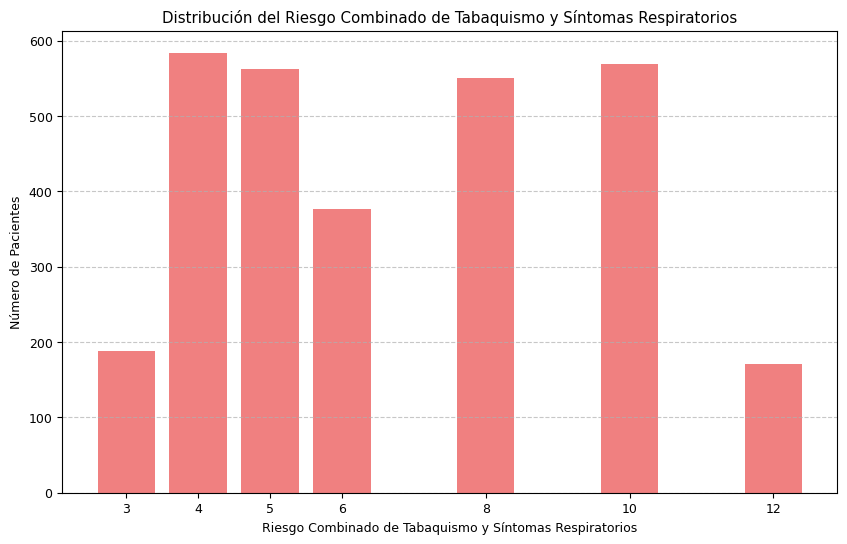

In [2643]:
# Creamos una nueva variable para el riesgo combinado de tabaquismo y síntomas respiratorios
dataset['Smoking_Respiratory_Risk'] = dataset['SMOKING'] * dataset[['COUGHING', 'SHORTNESS_OF_BREATH', 'WHEEZING']].sum(axis=1)

# Contanos la frecuencia de cada nivel del riesgo combinado
combined_risk_counts = dataset['Smoking_Respiratory_Risk'].value_counts().sort_index()

# Creamos un gráfico de barras para mostrar la distribución del riesgo combinado
plt.figure(figsize=(10, 6))
plt.bar(combined_risk_counts.index, combined_risk_counts.values, color='lightcoral')
plt.xlabel('Riesgo Combinado de Tabaquismo y Síntomas Respiratorios')
plt.ylabel('Número de Pacientes')
plt.title('Distribución del Riesgo Combinado de Tabaquismo y Síntomas Respiratorios')
plt.xticks(combined_risk_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Descripción del Gráfico:** El gráfico de barras muestra la distribución del riesgo combinado de tabaquismo y síntomas respiratorios. El eje X representa el nivel del riesgo combinado, donde un valor de 0 indica ausencia de tabaquismo o ausencia de síntomas respiratorios, y valores mayores indican la presencia de ambos factores. El eje Y muestra el número de pacientes que presentan cada nivel de riesgo combinado. Este gráfico proporciona una visión clara de cómo se distribuyen los pacientes en función de la combinación de tabaquismo y síntomas respiratorios.

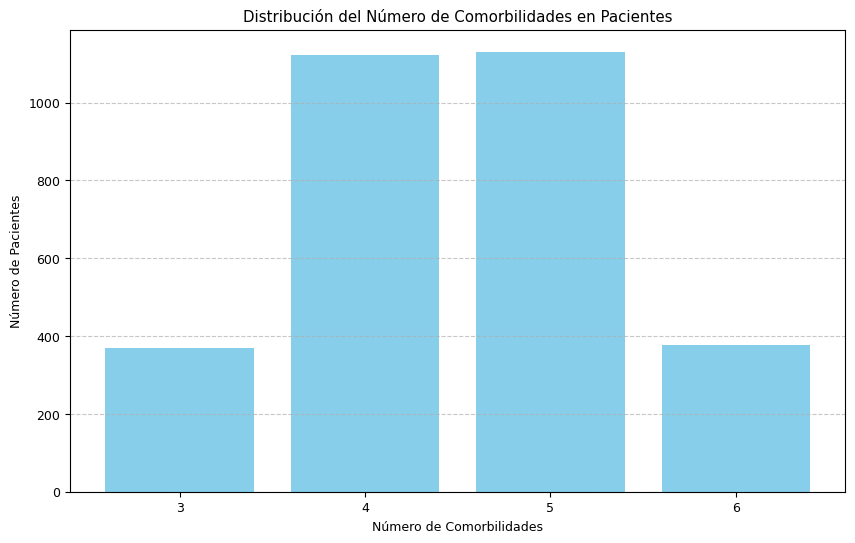

In [2644]:
# Crear una nueva variable para el número total de comorbilidades
dataset['Comorbidities'] = dataset[['CHRONIC_DISEASE', 'ALLERGY', 'FATIGUE']].sum(axis=1)

# Contar la frecuencia de cada nivel de comorbilidades
comorbidity_counts = dataset['Comorbidities'].value_counts().sort_index()

# Crear un gráfico de barras para mostrar la distribución de las comorbilidades
plt.figure(figsize=(10, 6))
plt.bar(comorbidity_counts.index, comorbidity_counts.values, color='skyblue')
plt.xlabel('Número de Comorbilidades')
plt.ylabel('Número de Pacientes')
plt.title('Distribución del Número de Comorbilidades en Pacientes')
plt.xticks(comorbidity_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Descripción del Gráfico:** El gráfico de barras ilustra la distribución del número de comorbilidades entre los pacientes. El eje X representa el número total de comorbilidades (es decir, la suma de condiciones crónicas como enfermedad crónica, alergia y fatiga), y el eje Y muestra la cantidad de pacientes que tienen cada nivel de comorbilidades. Este gráfico ayuda a identificar cómo la presencia de múltiples comorbilidades se distribuye entre los pacientes y puede indicar si los pacientes con un mayor número de comorbilidades tienen un riesgo elevado de cáncer de pulmón.

<h2> 4. Modelado </h2>

<h3>a. Métrica de performance a utilizar para evaluar los modelos .</h3>

### AUC-ROC (Área bajo la curva de operaciones del receptor)

La métrica principal que se utilizará para evaluar los modelos es el AUC-ROC. La AUC-ROC mide la capacidad del modelo para distinguir entre las clases positivas (pacientes con cáncer de pulmón) y negativas (pacientes sin cáncer). Se calcula como el área bajo la curva que relaciona la tasa de verdaderos positivos (sensibilidad) con la tasa de falsos positivos (1 - especificidad) a diferentes umbrales de clasificación.

**Ventajas de la AUC-ROC**

* **Independiente del umbral de clasificación:** No se ve afectada por la elección de un umbral específico, lo que permite evaluar el modelo en múltiples escenarios posibles.
* **Mide la capacidad de discriminación:** Evalúa cómo de bien el modelo es capaz de separar las clases positivas y negativas.
* **Independencia de la distribución de clases:** Es particularmente útil cuando las clases están desbalanceadas, lo que podría ser un factor en un dataset médico.
* **Interpretable:** El valor del AUC-ROC es fácil de interpretar, donde un valor cercano a 1 indica una excelente capacidad de discriminación y un valor cercano a 0.5 sugiere que el modelo no es mejor que una clasificación aleatoria.

**Otras Métricas Relevantes**

* **Precisión:** Mide la proporción de verdaderos positivos entre todos los positivos predichos. Es importante, pero puede ser engañosa en conjuntos de datos desbalanceados.
* **Sensibilidad (Recall):** Mide la proporción de verdaderos positivos entre todos los positivos reales. En contextos clínicos, como en el diagnóstico de cáncer, esta métrica es crucial para asegurarse de que el modelo identifica correctamente la mayor cantidad de casos positivos, aunque eso signifique aceptar algunos falsos positivos.
* **Especificidad:** Mide la proporción de verdaderos negativos entre todos los negativos reales. En situaciones donde se desea minimizar los falsos positivos, la especificidad es relevante.
* **F1-Score:** Combina la precisión y la sensibilidad, proporcionando una medida equilibrada entre ambas, especialmente útil cuando el objetivo es equilibrar ambos tipos de errores (falsos positivos y falsos negativos).

**Conclusión**

La AUC-ROC es la métrica más general y útil para evaluar la capacidad del modelo para discriminar entre clases positivas y negativas en este problema de clasificación binaria. Al ser independiente del umbral de clasificación y robusta ante desbalances en las clases, permite tener una evaluación amplia de la performance del modelo. No obstante, dado el contexto médico, se complementará con otras métricas como la sensibilidad, que es fundamental para identificar correctamente la mayor cantidad de casos positivos (pacientes con cáncer). Esto garantiza un análisis más completo y ajustado a las necesidades del problema.

<h3>b. Aplicación de Feature Engineering.</h3>

En la búsqueda de mejorar el rendimiento predictivo de un modelo de clasificación para predecir el cáncer de pulmón, se exploraron dos técnicas de Feature Engineering. Estas estrategias estaban orientadas a identificar si las nuevas características generadas podrían proporcionar una ventaja en la capacidad del modelo para diferenciar entre casos positivos y negativos de la enfermedad. Los enfoques evaluados fueron:

1. **Creación de una variable combinada para síntomas comunes.**
2. **Categorizar los datos de edad en grupos específicos.**

Cada técnica se comparó con un modelo base sin ingeniería de características para evaluar su impacto en la métrica AUC-ROC.

In [2645]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

label_encoder = LabelEncoder()
dataset['GENDER'] = label_encoder.fit_transform(dataset['GENDER'])

**Estrategia 1: Combinación de Síntomas Comunes**

Se introdujo una nueva variable denominada SYMPTOM_COMBINED, que combina la presencia de síntomas respiratorios comunes como tos, dificultad para respirar y sibilancias. La idea era que esta variable podría capturar la severidad general de los síntomas respiratorios, potencialmente útil para la predicción del cáncer de pulmón.

In [2646]:
dataset['SYMPTOM_COMBINED'] = np.where(
    (dataset['COUGHING'] == 1) | 
    (dataset['SHORTNESS_OF_BREATH'] == 1) | 
    (dataset['WHEEZING'] == 1), 
    1, 0
)

X = dataset.drop(columns=['LUNG_CANCER'])
y = dataset['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['SYMPTOM_COMBINED']

preprocessor = ColumnTransformer(
    transformers=[
        ('symptom_combined', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Entrenar y evaluar el modelo
pipeline.fit(X_train, y_train)
y_pred_base = pipeline.predict_proba(X_test)[:, 1]
auc_base = roc_auc_score(y_test, y_pred_base)
print(f"ROC AUC sin feature engineering: {auc_base}")

pipeline.fit(X_train, y_train)
y_pred_fe = pipeline.predict_proba(X_test)[:, 1]
auc_fe = roc_auc_score(y_test, y_pred_fe)
print(f"ROC AUC con feature engineering: {auc_fe}")


ROC AUC sin feature engineering: 0.5218565269567537
ROC AUC con feature engineering: 0.5218565269567537


**Resultados:**

* ROC AUC sin feature engineering: 0.5218565269567537
* ROC AUC con feature engineering: 0.5218565269567537

In [2647]:
dataset['AGE_GROUP'] = pd.cut(dataset['AGE'], bins=[0, 30, 50, np.inf], labels=['Joven', 'Adulto', 'Anciano'])

X = dataset.drop(columns=['LUNG_CANCER'])
y = dataset['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['AGE_GROUP']

preprocessor = ColumnTransformer(
    transformers=[
        ('age_group', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Entrenar y evaluar el modelo
pipeline.fit(X_train, y_train)
y_pred_base = pipeline.predict_proba(X_test)[:, 1]
auc_base = roc_auc_score(y_test, y_pred_base)
print(f"ROC AUC sin feature engineering: {auc_base}")

pipeline.fit(X_train, y_train)
y_pred_fe = pipeline.predict_proba(X_test)[:, 1]
auc_fe = roc_auc_score(y_test, y_pred_fe)
print(f"ROC AUC con feature engineering: {auc_fe}")


ROC AUC sin feature engineering: 0.521823192141873
ROC AUC con feature engineering: 0.521823192141873


**Resultados:**

* ROC AUC sin feature engineering: 0.521823192141873
* ROC AUC con feature engineering: 0.521823192141873

**Conclusión**

Las estrategias de ingeniería de características aplicadas en este caso no resultaron en mejoras significativas en el rendimiento del modelo. En particular:

2. **Combinación de Síntomas Comunes:** La introducción de una variable combinada para síntomas respiratorios comunes no mostró un cambio en la métrica AUC-ROC, sugiriendo que la nueva característica no aportó información adicional útil para la clasificación del cáncer de pulmón.

1. **Agrupación por Edad:** La categorización de los pacientes en grupos de edad tampoco resultó en una mejora en la AUC-ROC, indicando que el agrupar la edad en categorías no proporcionó una ventaja en la capacidad predictiva del modelo.

Estos resultados sugieren que, en este caso, las técnicas de ingeniería de características probadas no contribuyeron a una mejora significativa en el rendimiento del modelo. Es posible que se necesiten otras formas de ingeniería de características o técnicas avanzadas para lograr una mejora en la capacidad predictiva.

<h3>c. Modelos evaluados </h3>

In [2648]:
import warnings
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import GridSearchCV

<h4> Preparacion de los datos y creacion de pipelines </h4>

In [2649]:
pd.options.display.max_columns = 0

plt.rcParams.update({
    "font.size": 9,
    'figure.figsize': (15.0, 4.0),
})

np.set_printoptions(suppress=True)

warnings.filterwarnings('ignore')

In [2650]:
all_data = pd.read_csv('Lung_Cancer.csv')

In [2651]:
def evaluate_model(model, set_names=('train', 'validation'), title='', show_cm=True, show_roc=True):
    if title:
        display(title)
        
    final_metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1': [],
        'AUC-ROC': []  # Añadimos la métrica AUC-ROC        
    }
        
    for i, set_name in enumerate(set_names):
        assert set_name in ['train', 'validation', 'test']
        set_data = globals()[set_name] 

        y = set_data.LUNG_CANCER
        y_pred = model.predict(set_data)
        y_prob = model.predict_proba(set_data)[:, 1]  # Predicciones de probabilidad para la clase positiva
        
        final_metrics['Accuracy'].append(metrics.accuracy_score(y, y_pred))
        final_metrics['Precision'].append(metrics.precision_score(y, y_pred, pos_label='YES'))
        final_metrics['Recall'].append(metrics.recall_score(y, y_pred, pos_label='YES'))
        final_metrics['F1'].append(metrics.f1_score(y, y_pred, pos_label='YES'))
        final_metrics['AUC-ROC'].append(metrics.roc_auc_score(y, y_prob))  # Cálculo del AUC-ROC
        
        if show_cm:
            cm = metrics.confusion_matrix(y, y_pred)
            cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                                     display_labels=['negative', 'positive'])
            cm_plot.plot(cmap="Blues")
            cm_plot.ax_.set_title(set_name)
        
        if show_roc:
            fpr, tpr, _ = metrics.roc_curve(y, y_prob, pos_label='YES')
            plt.figure()
            plt.plot(fpr, tpr, label=f'{set_name} ROC curve (AUC = {final_metrics["AUC-ROC"][-1]:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{set_name} ROC Curve')
            plt.legend(loc="lower right")
            plt.show()

    display(pd.DataFrame(final_metrics, index=set_names))

<h5>Conjunto de datos </h5>

In [2652]:
# 60% train, 20% test, 20% validation
train, not_train = train_test_split(all_data, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

train.shape, validation.shape, test.shape

((1800, 16), (600, 16), (600, 16))

<h4>Mapper</h4>

In [2653]:
# Definimos el mapper. Recibe una lista de (columna/s, transformers)
mapper = DataFrameMapper([
    (['AGE'], [StandardScaler()]),
    (['GENDER'], [OneHotEncoder()]),
    (['SMOKING'], [OneHotEncoder()]),
    (['YELLOW_FINGERS'], [OneHotEncoder()]),
    (['ANXIETY'], [OneHotEncoder()]),
    (['PEER_PRESSURE'], [OneHotEncoder()]),
    (['CHRONIC_DISEASE'], [OneHotEncoder()]),
    (['FATIGUE'], [OneHotEncoder()]),
    (['ALLERGY'], [OneHotEncoder()]),
    (['WHEEZING'], [OneHotEncoder()]),
    (['ALCOHOL_CONSUMING'], [OneHotEncoder()]),
    (['COUGHING'], [OneHotEncoder()]),
    (['SHORTNESS_OF_BREATH'], [OneHotEncoder()]),
    (['SWALLOWING_DIFFICULTY'], [OneHotEncoder()]),
    (['CHEST_PAIN'], [OneHotEncoder()]),
])

# Lo entrenamos con train
mapper.fit(train)

DataFrameMapper(drop_cols=[],
                features=[(['AGE'], [StandardScaler()]),
                          (['GENDER'], [OneHotEncoder()]),
                          (['SMOKING'], [OneHotEncoder()]),
                          (['YELLOW_FINGERS'], [OneHotEncoder()]),
                          (['ANXIETY'], [OneHotEncoder()]),
                          (['PEER_PRESSURE'], [OneHotEncoder()]),
                          (['CHRONIC_DISEASE'], [OneHotEncoder()]),
                          (['FATIGUE'], [OneHotEncoder()]),
                          (['ALLERGY'], [OneHotEncoder()]),
                          (['WHEEZING'], [OneHotEncoder()]),
                          (['ALCOHOL_CONSUMING'], [OneHotEncoder()]),
                          (['COUGHING'], [OneHotEncoder()]),
                          (['SHORTNESS_OF_BREATH'], [OneHotEncoder()]),
                          (['SWALLOWING_DIFFICULTY'], [OneHotEncoder()]),
                          (['CHEST_PAIN'], [OneHotEncoder()])])

In [2654]:
sample = train.sample(5, random_state=42)

In [2655]:
mapper.transform(sample)

array([[-1.11253391,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ],
       [ 0.5269498 ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-0.08785659,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
  

<h4>Regresión logística</h4>

In [2656]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

'Logistic Regression'

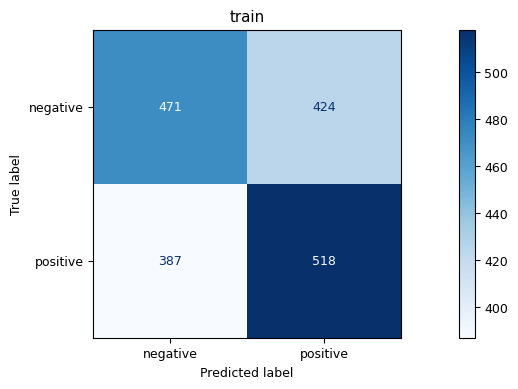

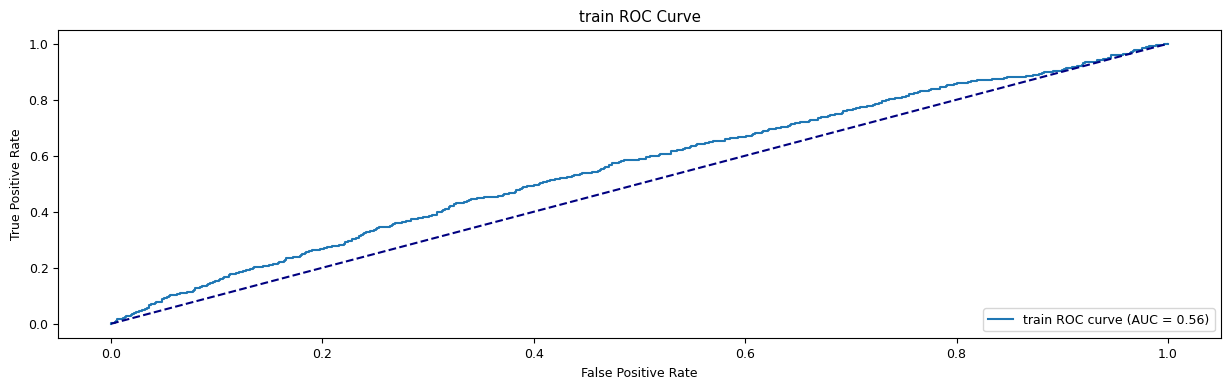

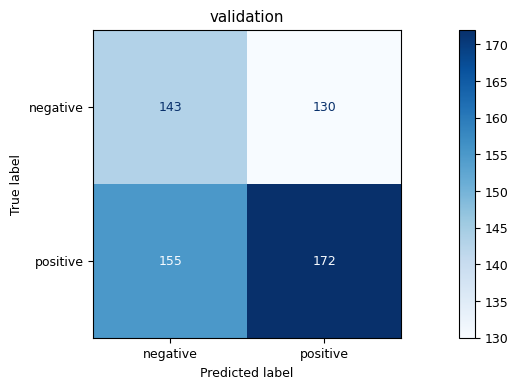

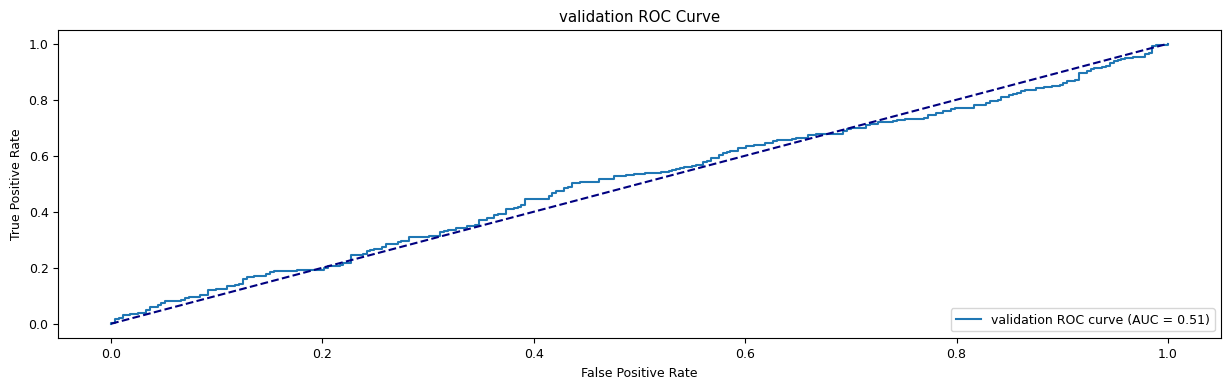

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.549444,0.549894,0.572376,0.56091,0.560152
validation,0.525000,0.569536,0.525994,0.54690,0.506839


In [2657]:
lr_model_si = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42)),
])

lr_model_si.fit(train, train.LUNG_CANCER)

evaluate_model(lr_model_si, set_names=('train', 'validation'), title='Logistic Regression')

**Conclusión**

* **Train:** El AUC-ROC de 0.56 indica un rendimiento moderado en la capacidad del modelo para discriminar entre clases en el conjunto de entrenamiento. Aunque el modelo tiene un rendimiento decente, el AUC-ROC sugiere que hay margen para mejorar en la capacidad de diferenciación entre las clases.

* **Validation:** El AUC-ROC de 0.51 en el conjunto de validación es significativamente menor, indicando que el modelo tiene dificultades para generalizar bien fuera del conjunto de entrenamiento. Esto refleja una pérdida de capacidad discriminativa en datos no vistos, sugiriendo que la regresión logística no está capturando adecuadamente la complejidad de los datos en el entorno de validación.

<h4> K-NN </h4>

In [2611]:
from sklearn.neighbors import KNeighborsClassifier

'Knn'

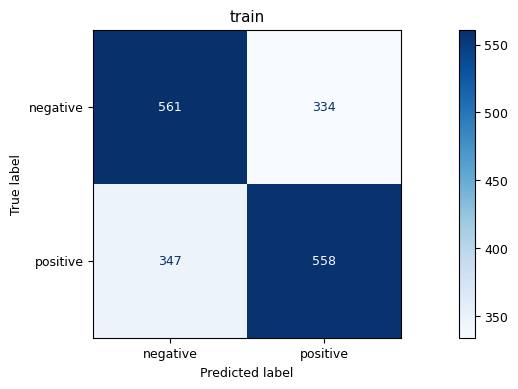

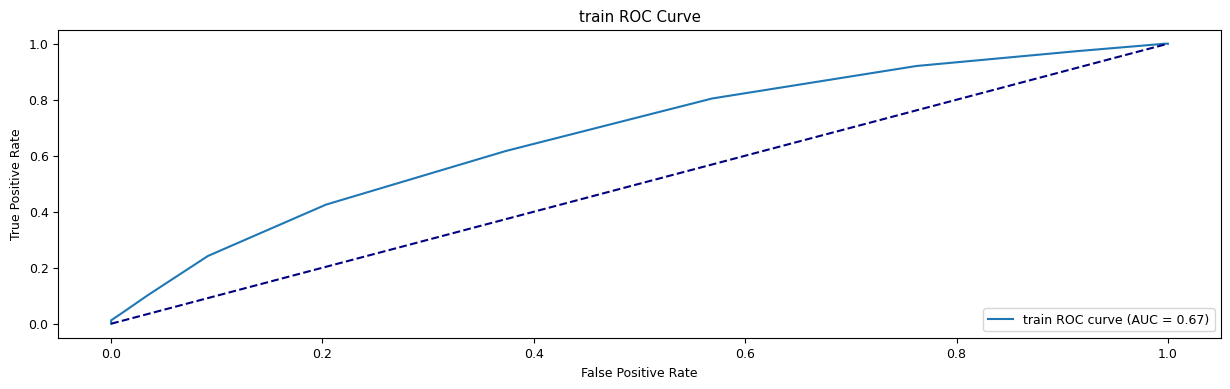

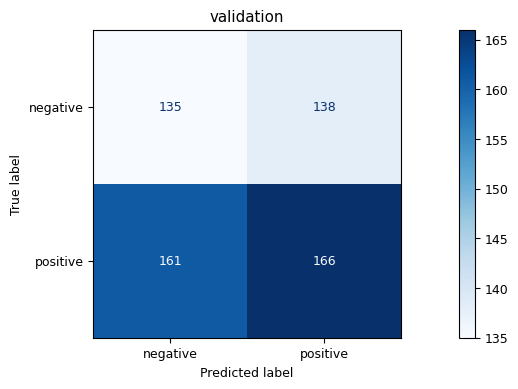

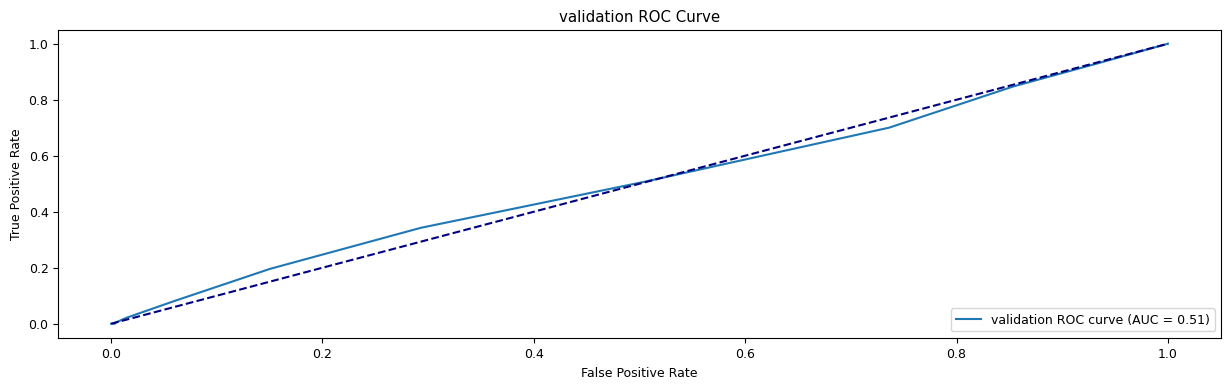

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.621667,0.625561,0.616575,0.621035,0.671973
validation,0.501667,0.546053,0.507645,0.526149,0.509045


In [2658]:
K = 15

knn_model = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K)),
])

knn_model.fit(train, train.LUNG_CANCER)

evaluate_model(knn_model, title='Knn', show_cm=True)

**Conclusión**

* **Train:** El AUC-ROC de 0.67 muestra una mejora notable en la capacidad de discriminación entre clases en el conjunto de entrenamiento en comparación con la regresión logística. Esto sugiere que el modelo K-NN es más eficaz en aprender patrones en los datos de entrenamiento.
* **Validation:** El AUC-ROC de 0.51 en el conjunto de validación es muy similar al obtenido con la regresión logística. Esto indica que, a pesar de un buen rendimiento en el entrenamiento, el modelo K-NN también enfrenta dificultades en la generalización, lo que puede ser indicativo de sobreajuste.

<h4> Decision Tree </h4>

'Decision Tree'

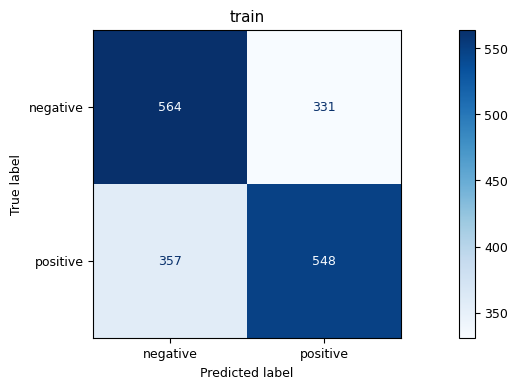

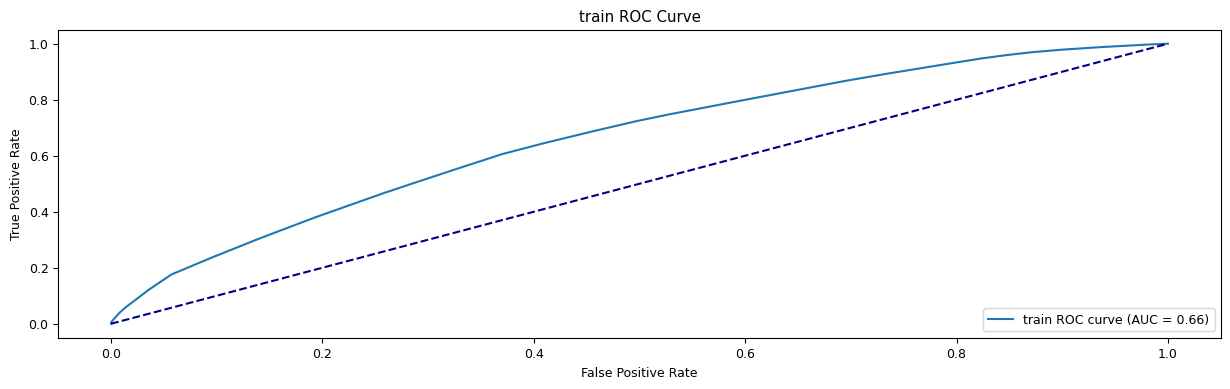

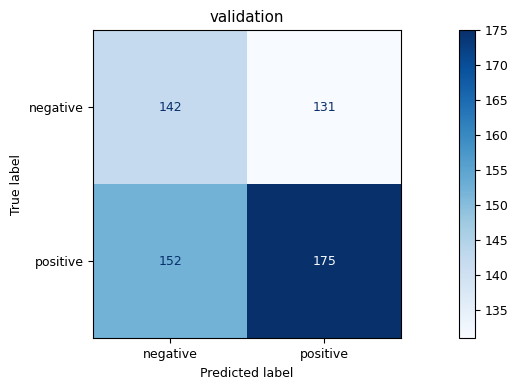

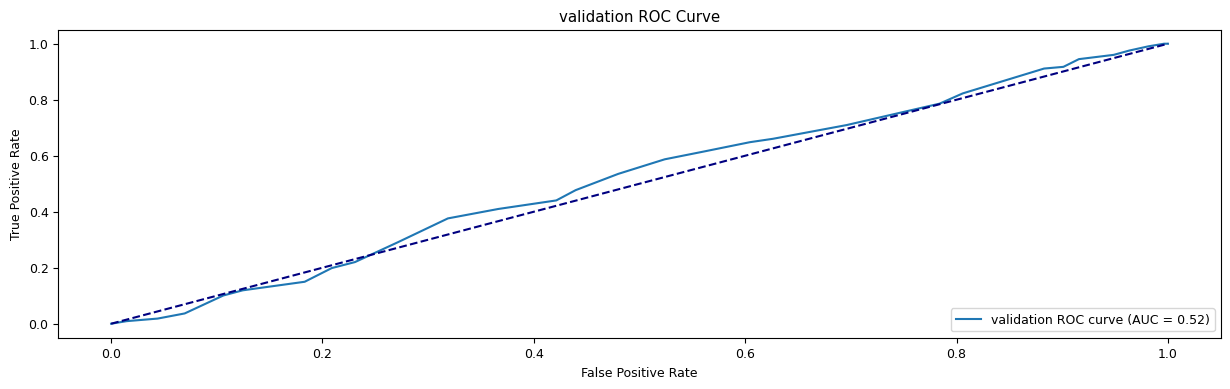

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.617778,0.623436,0.605525,0.614350,0.663072
validation,0.528333,0.571895,0.535168,0.552923,0.518522


In [2659]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_model = Pipeline([
    ('mapper', mapper),
    ('classifier', tree_model),
])

dt_model.fit(train, train.LUNG_CANCER)

evaluate_model(dt_model, title='Decision Tree')

**Conclusión**

El árbol de decisión tiene un rendimiento intermedio entre la regresión logística y K-NN. El Accuracy es similar en entrenamiento y validación, con una ligera caída en la validación, lo cual sugiere que el modelo no está sobreajustado y generaliza mejor que K-NN. Las métricas Precision, Recall y F1 son consistentes, lo que indica un balance razonable entre la capacidad de predicción de casos positivos y falsos positivos.

<h4> Grid Search </h4>

In [2660]:
models = {
    'Linear Regression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'random_state': [42, 123, 456],
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [2, 5, 7, 10, 15],
            'random_state': [42, 123, 456],
        }
    }
}

# Realiza la búsqueda de hiperparámetros
for model_name, model in models.items():
    grid_search = GridSearchCV(model['model'], model['params'])

    gs_pipe = Pipeline([
        ('mapper', mapper),
        ('imputer', IterativeImputer(random_state=42)),
        ('classifier', grid_search),
    ])

    gs_pipe.fit(train, train.LUNG_CANCER)
    
    print(f"Mejores hiperparámetros para {model_name}: {grid_search.best_params_}")
    print(f"Puntuación del mejor modelo: {grid_search.best_score_}")
    print()

Mejores hiperparámetros para Linear Regression: {'random_state': 42, 'solver': 'liblinear'}
Puntuación del mejor modelo: 0.5233333333333332

Mejores hiperparámetros para KNN: {'algorithm': 'ball_tree', 'n_neighbors': 5}
Puntuación del mejor modelo: 0.5438888888888889

Mejores hiperparámetros para Decision Tree: {'max_depth': 5, 'random_state': 456}
Puntuación del mejor modelo: 0.5233333333333334



Como podemos observar obtenemos los mejores hiperparametros para cada caso, ahora vamos a volver a ejecutar los modelos con los mismos visualizando las metricas y ver si notamos algun cambio

<h4> Regresión Logistica </h4> 


'Logistic Regression'

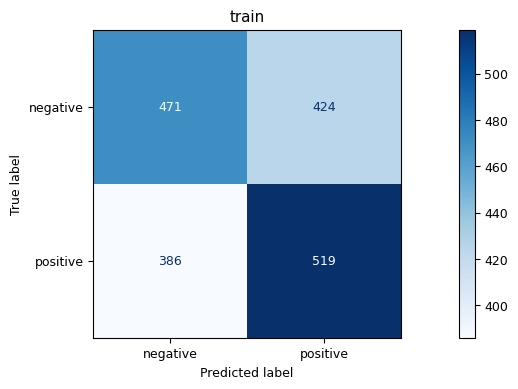

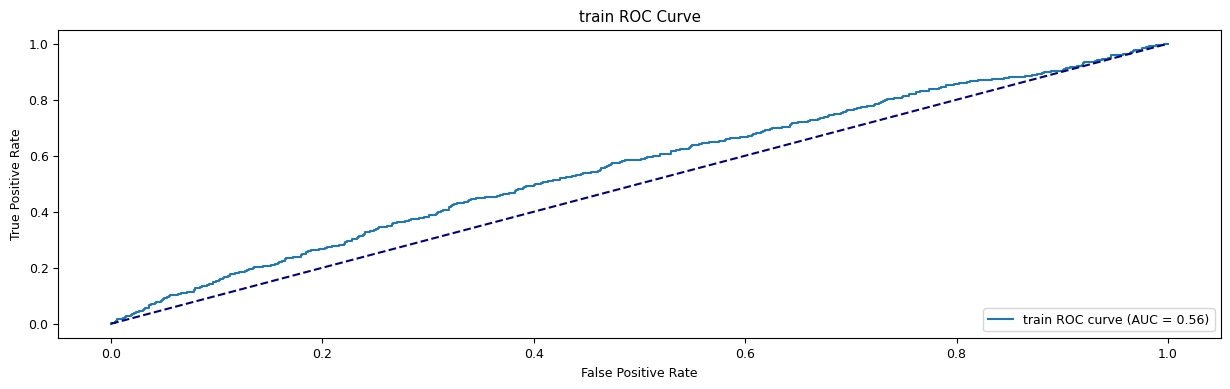

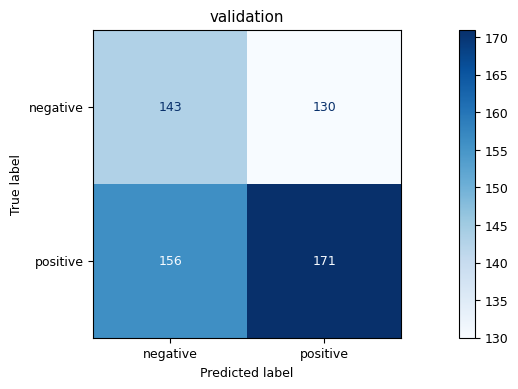

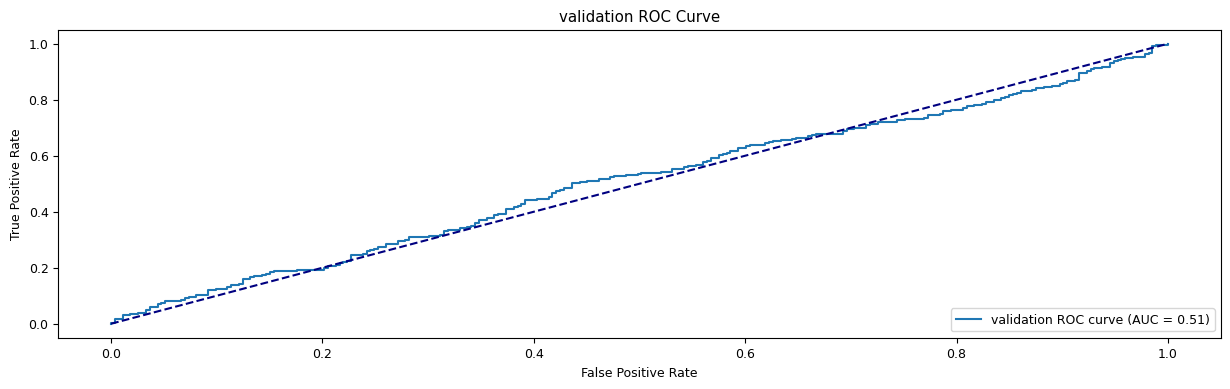

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.550000,0.550371,0.573481,0.561688,0.560143
validation,0.523333,0.568106,0.522936,0.544586,0.506940


In [2661]:
lr_model_si = Pipeline([
    ('mapper', mapper),
    ('imputer', IterativeImputer(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear')),
])

lr_model_si.fit(train, train.LUNG_CANCER)

evaluate_model(lr_model_si, set_names=('train', 'validation'), title='Logistic Regression')

<h4>KNN</h4>

'Knn'

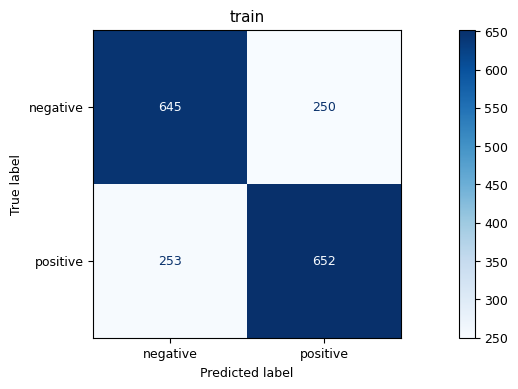

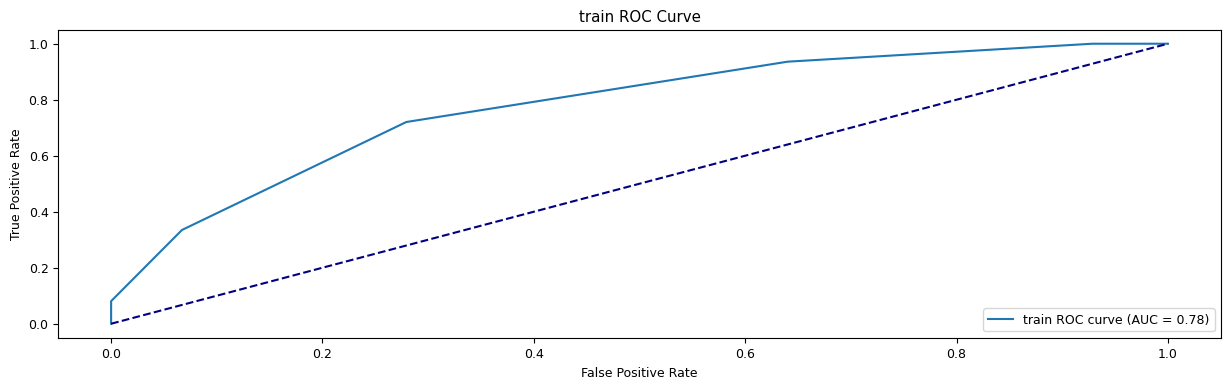

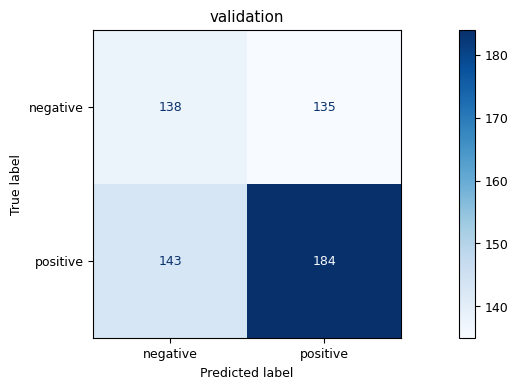

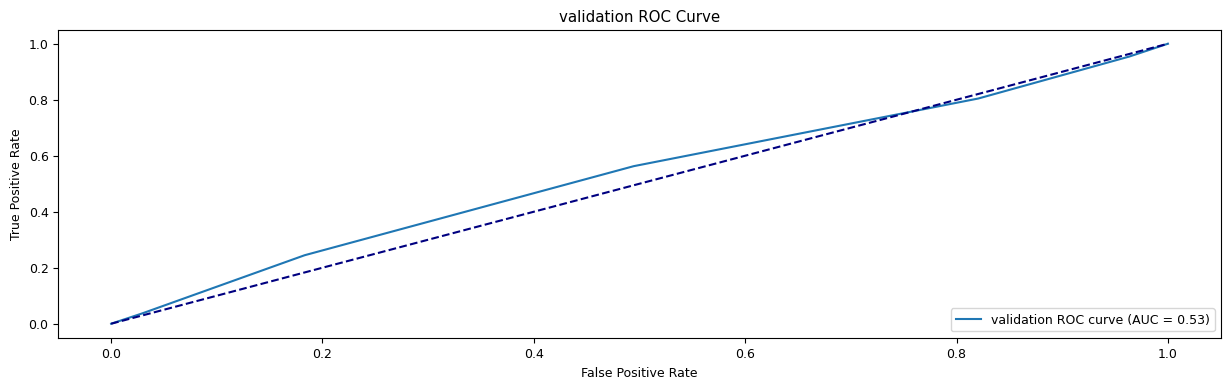

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.720556,0.722838,0.720442,0.721638,0.775359
validation,0.536667,0.576803,0.562691,0.569659,0.532076


In [2662]:
knn_model = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')),
])

knn_model.fit(train, train.LUNG_CANCER)

evaluate_model(knn_model, title='Knn', show_cm=True)

<h4>Decision Tree</h4>

'Decision Tree'

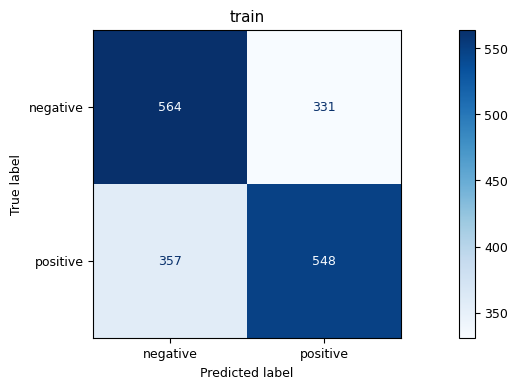

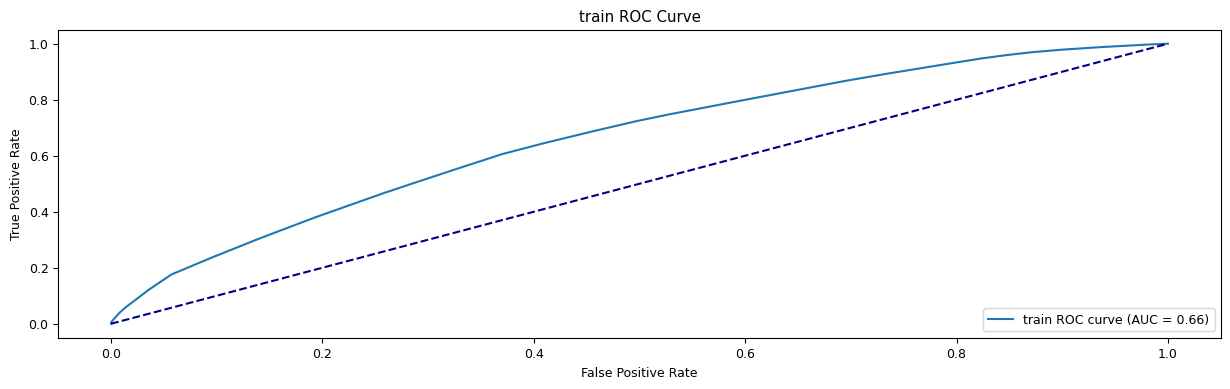

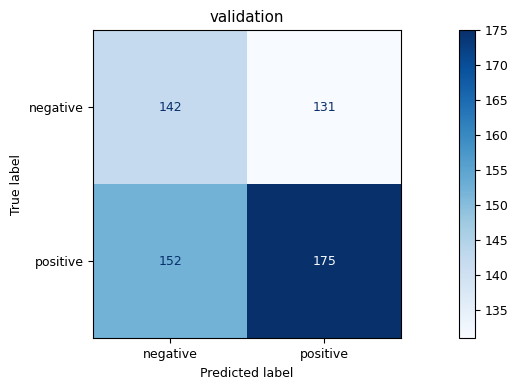

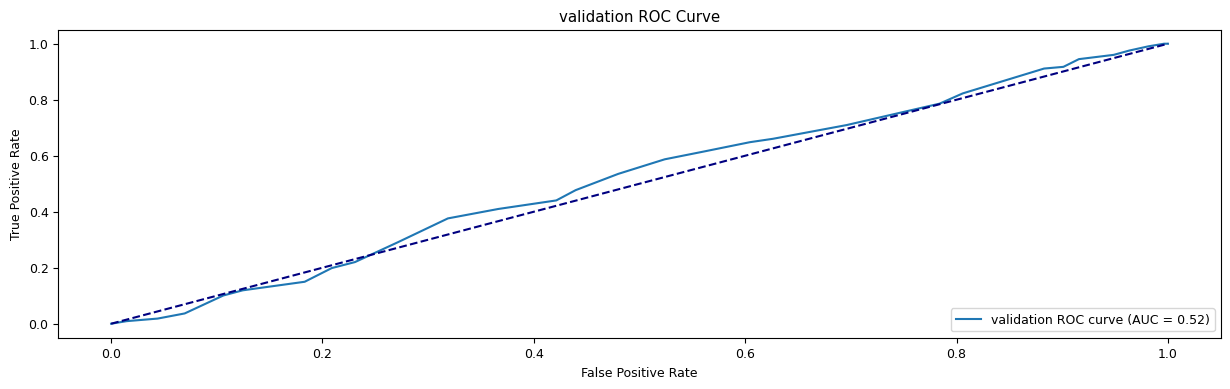

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.617778,0.623436,0.605525,0.614350,0.663072
validation,0.528333,0.571895,0.535168,0.552923,0.518522


In [2663]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=456)

dt_model = Pipeline([
    ('mapper', mapper),
    ('classifier', tree_model),
])

dt_model.fit(train, train.LUNG_CANCER)

evaluate_model(dt_model, title='Decision Tree')